# Poems stats

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [34]:
corpus = pd.read_csv("corpora/german_poems.csv")

In [35]:
corpus = corpus[(corpus["year"] >= 1890)]# & (corpus["year"] <= 1650) ]

In [36]:
corpus.head(2)

,pid,filename,poet,title,year,poem,poemlength
8,10927,"Tucholsky, Kurt_Auf ein Frollein_1912","Tucholsky, Kurt",Auf ein Frollein,1912,"Gott Amor zieht die Pfeile aus dem Köcher, er ...",218
11,7918,"Dehmel, Richard Fedor Leopold_UNTITLED_1891","Dehmel, Richard Fedor Leopold",UNTITLED,1891,"Der Abend war so dunkelschwer, und schwer durc...",102


In [37]:
a = corpus[corpus["year"] == 1899]
b = corpus[corpus["year"] == 1900]

In [38]:
a.poet.value_counts()

Heym, Georg               124
Holz, Arno                 50
Hofmannsthal, Hugo von      9
Hartleben, Otto Erich       3
Rilke, Rainer Maria         1
Name: poet, dtype: int64

In [39]:
b.poet.value_counts()

Rilke, Rainer Maria      346
Trakl, Georg             136
Sack, Gustav              65
Rubiner, Ludwig           13
Lautensack, Heinrich      11
Hartleben, Otto Erich      4
Name: poet, dtype: int64

In [10]:
corpus.shape

(13739, 7)

## Visualization

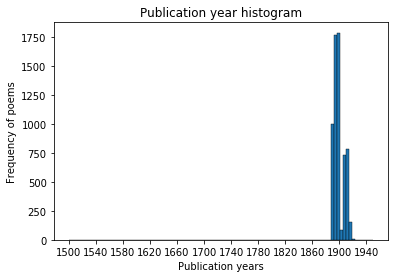

In [41]:
plt.hist(corpus["year"], 
         histtype="bar",
         color="#1f77b4",
         edgecolor="black",
         linewidth=0.4,
         bins=100, 
         range=[1500,1950])
plt.gca().set(title='Publication year histogram',
              xlabel='Publication years',
              ylabel='Frequency of poems')
plt.xticks(np.arange(1500, 1950, 40))
"""
plt.savefig('../../data/figures/all_publication_years.png',
            dpi=300,
            bbox_inches='tight')
"""
plt.show()

## SVM

In [55]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import numpy as np

labels = corpus["poet"]
vector  = TfidfVectorizer().fit_transform(corpus["poem"])


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,
                                                    random_state=42)

def classify_svm(C=1.0, cv=3):   
    # SVM
    svm_classifier = LinearSVC(C=C)
    svm = svm_classifier.fit(X_train, y_train)

    # cross validation des Trainingsdatensatzes
    svm_scores = cross_val_score(svm_classifier, vector, labels, cv=cv)
    svm_mean = np.mean(svm_scores)

    print("Der Mittelwert der cross validation bei der Klassifizierung " 
          + f" mit SVM ist {str(np.around(svm_mean, decimals=3))}."
          + "\n")


    # F1-score des Testdatensatzes
    y_pred = svm_classifier.predict(X_test)
    svm_f1 = f1_score(y_test, y_pred, average="micro")

    print("Der F1-score für die Klassifizierung mit SVM ist "
          + f"{str(np.around(svm_f1, decimals=3))}.")
classify_svm()

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.915.

Der F1-score für die Klassifizierung mit SVM ist 0.927.
